---

## **Introduction**

### Slot Machines and Their Rewards and Probabilities

In this scenario, there are 10 slot machines, each with a specified reward and the probability of receiving that reward. The details are as follows:

| Slot Machine Number | Reward | Probability |
|----------------------|--------|-------------|
| 0                    | 10     | 0.10        |
| 1                    | 20     | 0.05        |
| 2                    | 10     | 0.20        |
| 3                    | 30     | 0.15        |
| 4                    | 35     | 0.03        |

Using the epsilon-greedy policy with different values of epsilon (`epsilon = 0`, `epsilon = 0.1`, `epsilon = 0.3`), we aim to evaluate the performance of the policy by comparing the total rewards accumulated per episode.

This analysis will help understand how exploration-exploitation trade-offs influence the outcomes in this problem.

---

In [110]:
import numpy as np
import matplotlib.pyplot as plt

class Bandits:
    def __init__(self):
        self.slot_machines = {
            0: [10, 0.10],  # 슬롯머신 번호: [보상의 크기, 보상의 확률]
            1: [20, 0.05],
            2: [10, 0.20],
            3: [30, 0.15],
            4: [35, 0.03]
        }

    def game_play(self, machine_number):
        if self.slot_machines[machine_number][1] >= np.random.rand():
            return self.slot_machines[machine_number][0]
        return 0

    def get_optimal_action_for_evaluation(self):
        expected_reward = [
            self.slot_machines[key][0] * self.slot_machines[key][1]
            for key in range(len(self.slot_machines))
        ]
        return np.argmax(expected_reward)


class Agent:
    def __init__(self, optimal_action, epsilon=0, total_machines_num=5):
        self.total_machines_num = total_machines_num
        self.optimal_action = optimal_action
        self.epsilon = epsilon

        self.Qs = np.zeros(self.total_machines_num)
        self.ns = np.zeros(self.total_machines_num)

    def get_action_epsilon_greedy(self):
        if self.epsilon >= np.random.rand():
            return np.random.randint(low=0, high=self.total_machines_num)
        return np.argmax(self.Qs)

    def update_action_value(self, machine_number, reward):
        self.ns[machine_number] += 1
        self.Qs[machine_number] += (1 / self.ns[machine_number]) * (reward - self.Qs[machine_number])

In [111]:

# Main code
bandits = Bandits()
optimal_action = bandits.get_optimal_action_for_evaluation()
print(f"Optimal Action: {optimal_action}")


agent_0 = Agent(optimal_action, epsilon = 0)
agent_1 = Agent(optimal_action, epsilon = 0.1)
agent_3 = Agent(optimal_action, epsilon = 0.3)


epsilon_0_curve = []
epsilon_01_curve = []
epsilon_03_curve = []


agent_dict = {
    'Agent_epsilon_0': [agent_0, epsilon_0_curve],
    'Agent_epsilon_0.1': [agent_1, epsilon_01_curve],
    'Agent_epsilon_0.3': [agent_3, epsilon_03_curve]
}

total_run = 10
total_episode = 1500

for run in range(total_run):
  for agent in agent_dict:
    num_optimal_action = 0
    total_reward = 0
    for episode in range(1, total_episode + 1):
      machine_number = agent_dict[agent][0].get_action_epsilon_greedy()
      action_history = np.append(action_history, machine_number)

      reward = bandits.game_play(machine_number)
      total_reward += reward

      agent_dict[agent][1].append(total_reward/episode)

      agent_dict[agent][0].update_action_value(machine_number, reward)



Optimal Action: 3


In [112]:
for agent in agent_dict:
  agent_dict[agent][1] = np.array(agent_dict[agent][1]).reshape(total_run, -1)

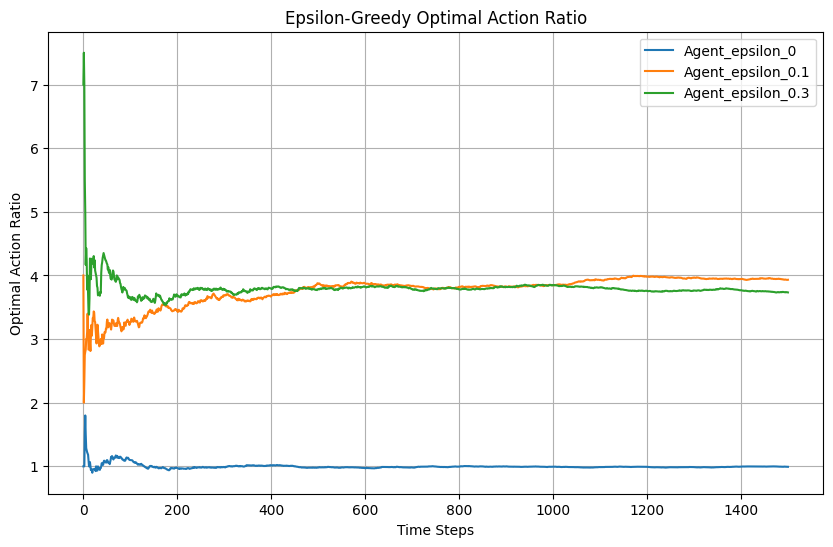

In [113]:
plt.figure(figsize=(10, 6))
for agent in agent_dict:
# Plot the optimal action ratio
  average_curve = np.average(agent_dict[agent][1], axis = 0)
  plt.plot(average_curve, label=agent)
plt.xlabel("Time Steps")
plt.ylabel("Optimal Action Ratio")
plt.title("Epsilon-Greedy Optimal Action Ratio")
plt.legend()
plt.grid()
plt.show()


---

## **Conclusion**

The results above represent the statistical mean, as they are the averaged values obtained after running 1,500 episodes three times in total.

---

When epsilon is 0.3, the agent performs exploration more frequently and quickly finds the optimal or near-optimal action. Therefore, in the early stages, the total rewards for the case where epsilon is 0.3 are higher. However, as episodes progress, the agent with epsilon set to 0.1 also goes through sufficient exploration and finds the optimal or near-optimal action.

Due to the constraint of performing exploration with a 30% probability, the proportion of greedy actions in the case of epsilon = 0.3 becomes lower compared to the case of epsilon = 0.1. As a result, after enough episodes have passed, the total rewards per episode for epsilon = 0.1 exceed those for epsilon = 0.3. This behavior can be observed in the above graph.

---